In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xy-data/xy_data.csv


## Gradient Descent

[I 2025-11-09 06:24:39,251] A new study created in memory with name: no-name-7bda194e-b9a4-43e4-9149-e71a9dddb8a6
[I 2025-11-09 06:24:39,293] Trial 0 finished with value: 37.07380273302643 and parameters: {'theta': 14.11790434742699, 'M': 0.04059164796578729, 'X': 96.00531636765331}. Best is trial 0 with value: 37.07380273302643.
[I 2025-11-09 06:24:39,313] Trial 1 finished with value: 4.2354260789434734 and parameters: {'theta': 16.463385761661165, 'M': -0.015610557109960323, 'X': 42.52313156722288}. Best is trial 1 with value: 4.2354260789434734.
[I 2025-11-09 06:24:39,333] Trial 2 finished with value: 3.2858279705343616 and parameters: {'theta': 34.05222294036028, 'M': -0.01474253463623755, 'X': 52.217850999746354}. Best is trial 2 with value: 3.2858279705343616.
[I 2025-11-09 06:24:39,352] Trial 3 finished with value: 36.74520774403698 and parameters: {'theta': 29.433680700324704, 'M': -0.024749945911478267, 'X': 6.343955595294515}. Best is trial 2 with value: 3.2858279705343616.
[

Best trial: 1.392601
Best parameters: {'theta': 27.460274841713975, 'M': -0.01675357780663252, 'X': 52.95919883478626}


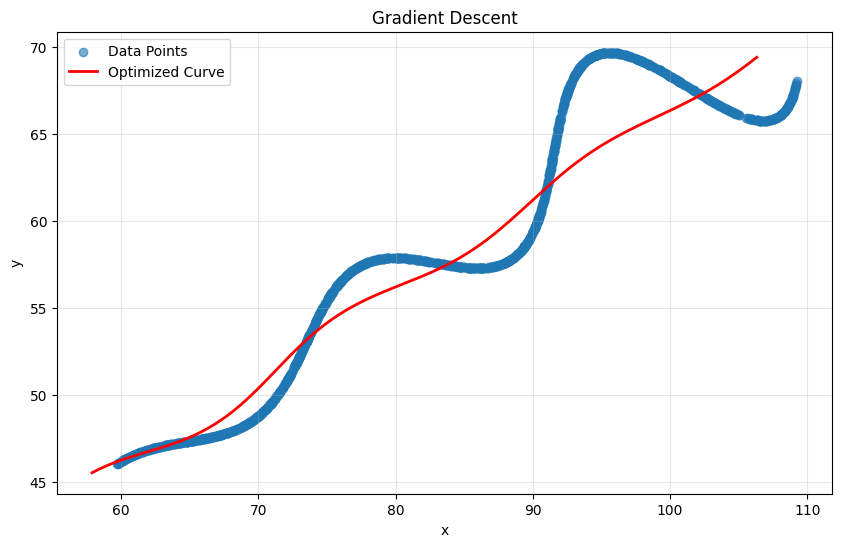

In [2]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/kaggle/input/xy-data/xy_data.csv')
data_points = data[['x', 'y']].values
t_values = np.linspace(6, 60, 200)

def objective(trial):
    
    theta = trial.suggest_float('theta', 0, 50)
    M = trial.suggest_float('M', -0.05, 0.05)
    X = trial.suggest_float('X', 0, 100)
    
    theta_rad = np.radians(theta)
    
    
    x_curve = t_values * np.cos(theta_rad) - np.exp(M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + X
    y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)
    curve_points = np.column_stack([x_curve, y_curve])
    
    
    distances = np.min(
        np.abs(curve_points[:, 0] - data_points[:, 0, None]) + 
        np.abs(curve_points[:, 1] - data_points[:, 1, None]), 
        axis=0
    )
    
    return np.mean(distances)


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


print(f"Best trial: {study.best_trial.value:.6f}")
print(f"Best parameters: {study.best_trial.params}")


best_params = study.best_trial.params
theta_rad = np.radians(best_params['theta'])
x_curve = t_values * np.cos(theta_rad) - np.exp(best_params['M'] * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + best_params['X']
y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(best_params['M'] * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)

plt.figure(figsize=(10, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], alpha=0.6, label='Data Points')
plt.plot(x_curve, y_curve, 'r-', linewidth=2, label='Optimized Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('grad_desc.png')
plt.show()

## Bayesian Parameter Optimization

Starting Bayesian Optimization...
|   iter    |  target   |   theta   |     M     |     X     |
-------------------------------------------------------------
| 1         | -8258.928 | 20.087134 | -0.007448 | 21.133175 |
| 2         | -6851.583 | 38.958073 | 0.0114525 | 41.072210 |
| 3         | -754.5317 | 26.411935 | 0.0295739 | 51.861181 |
| 4         | -4892.930 | 29.461708 | 0.0073359 | 37.504314 |
| 5         | -10573.57 | 18.547288 | 0.0425454 | 79.269644 |
| 6         | -17735.55 | 11.296364 | -0.039945 | 92.538424 |
| 7         | -6062.961 | 6.5428638 | 0.05      | 49.653164 |
| 8         | -821.4754 | 26.613595 | -0.021784 | 50.823274 |
| 9         | -3450.151 | 50.0      | -0.05     | 73.449929 |
| 10        | -29843.52 | 50.0      | -0.05     | 0.0       |
| 11        | -11202.69 | 50.0      | 0.05      | 100.0     |
| 12        | -16467.11 | 0.0       | 0.05      | 0.0       |
| 13        | -1579.736 | 37.565141 | -0.05     | 62.053162 |
| 14        | -4409.308 | 50.0      

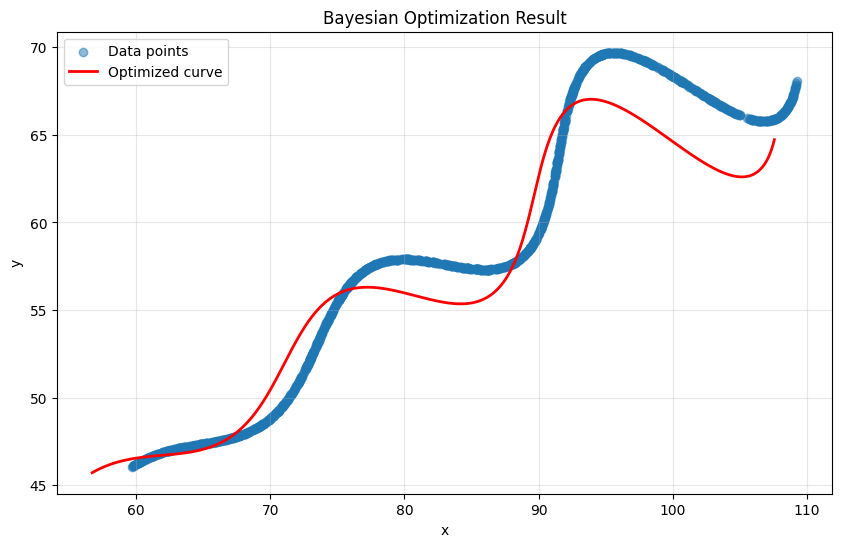

In [3]:
import numpy as np
import pandas as pd
from bayes_opt import BayesianOptimization


data = pd.read_csv('/kaggle/input/xy-data/xy_data.csv') 
data_points = data[['x', 'y']].values


num_points = 500
t_values = np.linspace(6, 60, num_points)

def l1_distance(x_pred, y_pred, dataset):
    distances = np.abs(x_pred - dataset[:, 0]) + np.abs(y_pred - dataset[:, 1])
    return np.min(distances)

def objective_function(theta, M, X):
    total_error = 0
    theta_rad = np.radians(theta)
    
    for t in t_values:
        x_pred = t * np.cos(theta_rad) - np.exp(M * t) * np.sin(0.3 * t) * np.sin(theta_rad) + X
        y_pred = 42 + t * np.sin(theta_rad) + np.exp(M * t) * np.sin(0.3 * t) * np.cos(theta_rad)
        
        total_error += l1_distance(x_pred, y_pred, data_points)
    return -total_error

pbounds = {
    'theta': (0, 50),      
    'M': (-0.05, 0.05),    
    'X': (0, 100)          
}


optimizer = BayesianOptimization(f=objective_function,    pbounds=pbounds,    verbose=2  )


print("Starting Bayesian Optimization...")
optimizer.maximize(
    init_points=5,   
    n_iter=50        
)


print(f"Best parameters: {optimizer.max['params']}")
print(f"Best objective value: {optimizer.max['target']}")
print(f"Best L1 distance: {-optimizer.max['target']}")  


import matplotlib.pyplot as plt


best_theta = optimizer.max['params']['theta']
best_M = optimizer.max['params']['M']
best_X = optimizer.max['params']['X']


theta_rad = np.radians(best_theta)
x_curve = t_values * np.cos(theta_rad) - np.exp(best_M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + best_X
y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(best_M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)


plt.figure(figsize=(10, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], alpha=0.5, label='Data points')
plt.plot(x_curve, y_curve, 'r-', linewidth=2, label='Optimized curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Optimization Result')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("bayes.png")
plt.show()

## Grid Search Optimization (Random Search)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def parametric_curve(t, theta, M, X):
    theta_rad = np.radians(theta)
    x = t * np.cos(theta_rad) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta_rad) + X
    y = 42 + t * np.sin(theta_rad) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta_rad)
    return x, y

def calculate_l1_distance(params, data_points, t_values):
    theta, M, X = params
    curve_x, curve_y = parametric_curve(t_values, theta, M, X)
    total_distance = 0
    for data_x, data_y in data_points:
        distances = np.abs(curve_x - data_x) + np.abs(curve_y - data_y)
        min_distance = np.min(distances)
        total_distance += min_distance
    
    return total_distance / len(data_points)


def grid_search_optimization(data_points, t_values):
    best_params = None
    best_distance = float('inf')
    
    
    theta_range = np.linspace(0, 50, 10)
    M_range = np.linspace(-0.05, 0.05, 8)
    X_range = np.linspace(0, 100, 10)
    
    for theta in theta_range:
        for M in M_range:
            for X in X_range:
                distance = calculate_l1_distance((theta, M, X), data_points, t_values)
                if distance < best_distance:
                    best_distance = distance
                    best_params = (theta, M, X)
    
    return best_params, best_distance

In [5]:
t_values = np.linspace(6, 60,1500)

In [6]:
df = pd.read_csv('/kaggle/input/xy-data/xy_data.csv') 
grid_search_optimization(df[['x','y']].values,t_values)

((33.33333333333333, 0.03571428571428571, 55.55555555555556),
 1.279592803653574)

In [7]:
from scipy.spatial.distance import cdist
def l1_loss_func(params):
    theta, M, X = params
    theta_rad = np.radians(theta)
    
    x_curve = t_values * np.cos(theta_rad) - np.exp(M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + X
    y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)
    curve_points = np.column_stack([x_curve, y_curve])
    
    distances = cdist(data_points, curve_points)
    min_distances = np.min(distances, axis=1)
    return np.mean(min_distances)

In [8]:
theta, M, X = (33.33333333333333, 0.03571428571428571, 55.55555555555556)
theta_rad = np.radians(theta)
x_curve = t_values * np.cos(theta_rad) - np.exp(M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + X
y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)

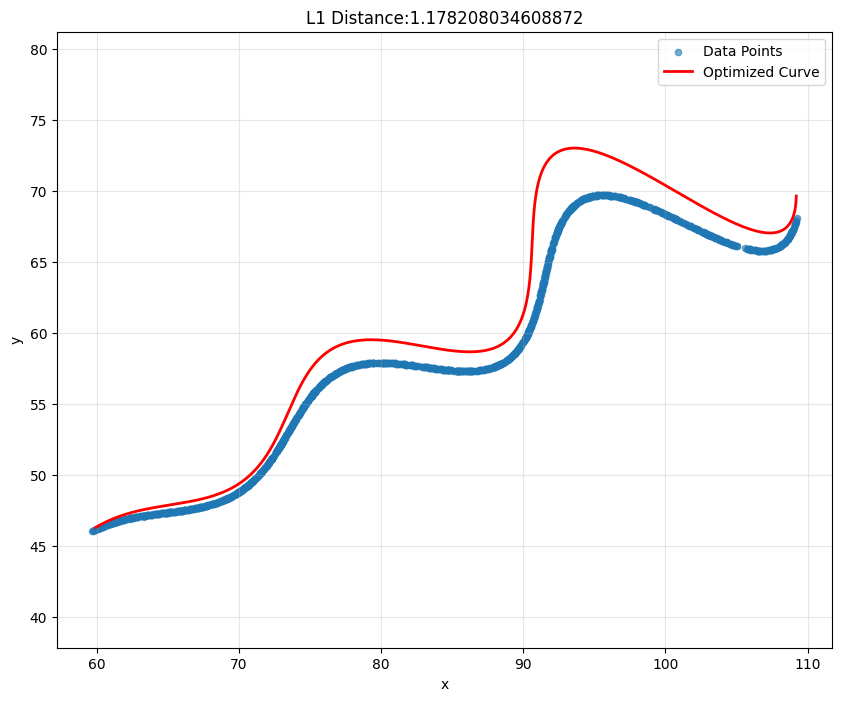

In [9]:
plt.figure(figsize=(10, 8))

plt.scatter(df['x'], df['y'], 
           alpha=0.6, label='Data Points', s=20)
plt.plot(x_curve, y_curve, 'r-', 
        linewidth=2, label='Optimized Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'L1 Distance:{l1_loss_func((33.33333333333333, 0.03571428571428571, 55.55555555555556))}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.savefig('grid_search.png')
plt.show()


## Particle Swarm Optimization

In [10]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=05766b77ac68ba0fd2fa6dfacd40ca2a2a7fa9d2708bde784f70793c465f162f
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
Note: you may need to restart the kernel to use updated packages.


In [11]:
from pyswarm import pso
from scipy.spatial.distance import cdist
data_points = data[['x', 'y']].values
t_values = np.linspace(6, 60, 1500)

def l1_loss_func(params):
    theta, M, X = params
    theta_rad = np.radians(theta)
    
    x_curve = t_values * np.cos(theta_rad) - np.exp(M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + X
    y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)
    curve_points = np.column_stack([x_curve, y_curve])
    
    distances = cdist(data_points, curve_points)
    min_distances = np.min(distances, axis=1)
    return np.mean(min_distances)
lb = [0, -0.05, 0]
ub = [50, 0.05, 100]  
best_params, best_score = pso(l1_loss_func,lb, ub, swarmsize=30, maxiter=100, debug=True)

No constraints given.
New best for swarm at iteration 1: [ 2.61617076e+01 -5.00000000e-02  5.13579887e+01] 1.9506790843064676
Best after iteration 1: [ 2.61617076e+01 -5.00000000e-02  5.13579887e+01] 1.9506790843064676
Best after iteration 2: [ 2.61617076e+01 -5.00000000e-02  5.13579887e+01] 1.9506790843064676
New best for swarm at iteration 3: [ 3.15853495e+01 -6.37944135e-03  5.52928928e+01] 1.5963859191253371
Best after iteration 3: [ 3.15853495e+01 -6.37944135e-03  5.52928928e+01] 1.5963859191253371
New best for swarm at iteration 4: [2.62371866e+01 1.33319639e-02 5.39103386e+01] 1.5108694202447575
Best after iteration 4: [2.62371866e+01 1.33319639e-02 5.39103386e+01] 1.5108694202447575
New best for swarm at iteration 5: [2.71827309e+01 2.14934758e-02 5.37664535e+01] 0.969764628765273
Best after iteration 5: [2.71827309e+01 2.14934758e-02 5.37664535e+01] 0.969764628765273
Best after iteration 6: [2.71827309e+01 2.14934758e-02 5.37664535e+01] 0.969764628765273
New best for swarm at 

In [12]:
best_score

0.010611157407741253

In [13]:
best_params

array([2.99995036e+01, 3.00002457e-02, 5.49993364e+01])

In [14]:
theta, M, X = best_params
theta_rad = np.radians(theta)
x_curve = t_values * np.cos(theta_rad) - np.exp(M * t_values) * np.sin(0.3 * t_values) * np.sin(theta_rad) + X
y_curve = 42 + t_values * np.sin(theta_rad) + np.exp(M * t_values) * np.sin(0.3 * t_values) * np.cos(theta_rad)

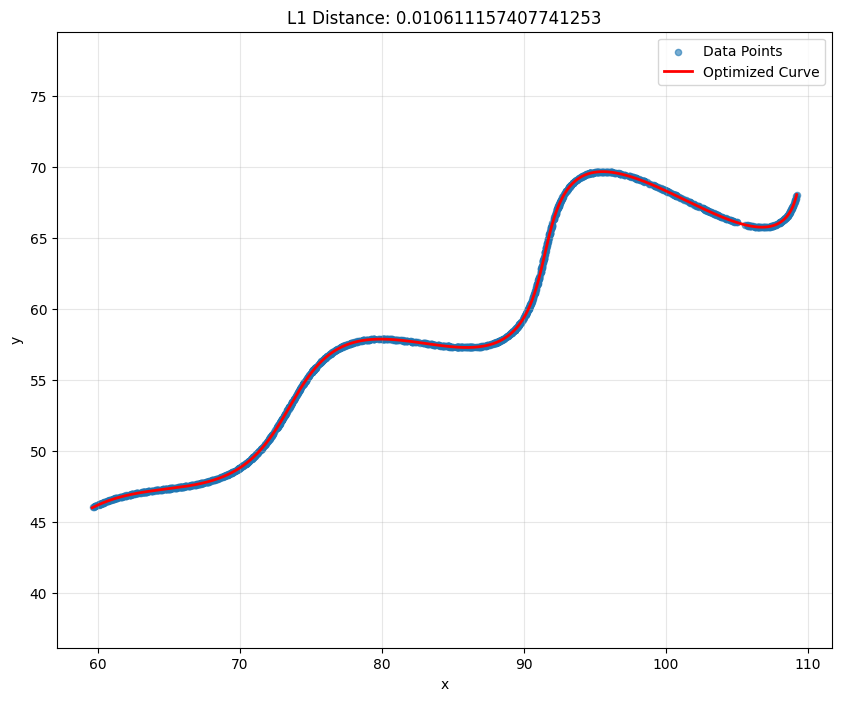

In [15]:
plt.figure(figsize=(10, 8))


plt.scatter(df['x'], df['y'], 
           alpha=0.6, label='Data Points', s=20)
plt.plot(x_curve, y_curve, 'r-', 
        linewidth=2, label='Optimized Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'L1 Distance: {best_score}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.savefig('pso.png')
plt.show()


## Best Parameters

In [16]:
theta =30
M = 0.03
X = 55